In [63]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from pandas import DataFrame
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import string

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

In [39]:
# download nltk corpus (first time only)
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-t

True

In [2]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
data = pd.read_csv("amazon_co-ecommerce_sample.csv")

In [67]:
# Drop the null values 
data.dropna(inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 9949
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      511 non-null    object 
 1   product_name                                 511 non-null    object 
 2   manufacturer                                 511 non-null    object 
 3   price                                        511 non-null    object 
 4   number_available_in_stock                    511 non-null    object 
 5   number_of_reviews                            511 non-null    object 
 6   number_of_answered_questions                 511 non-null    float64
 7   average_review_rating                        511 non-null    object 
 8   amazon_category_and_sub_category             511 non-null    object 
 9   customers_who_bought_this_item_also_bought   511 non-null    object 
 10  d

In [69]:
print('\nDimension of the data is: ',data.shape)
print('\nLength of the data is: ' + str(len(data.index)))


Dimension of the data is:  (511, 17)

Length of the data is: 511


In [70]:
# Create new dataframe from existing dataframe
Amazon_data = data[['average_review_rating','customer_reviews']].copy()

In [71]:
Amazon_data.head()

,average_review_rating,customer_reviews
0,4.9 out of 5 stars,Worth Buying For The Pictures Alone (As Ever) ...
2,3.9 out of 5 stars,**Highly Recommended!** // 5.0 // 26 May 2015 ...
7,4.3 out of 5 stars,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...
8,5.0 out of 5 stars,Five Stars // 5.0 // 23 Dec. 2015 // By\n \...
30,5.0 out of 5 stars,Five Stars // 5.0 // 26 Nov. 2014 // By\n \...


In [72]:
Average_Rating = Amazon_data['average_review_rating']
Average_Rating.head()

0     4.9 out of 5 stars
2     3.9 out of 5 stars
7     4.3 out of 5 stars
8     5.0 out of 5 stars
30    5.0 out of 5 stars
Name: average_review_rating, dtype: object

In [73]:
Average_Review_Rating = Average_Rating.str.split('out').str[0]

In [74]:
Average_Review_Rating.head()

0     4.9 
2     3.9 
7     4.3 
8     5.0 
30    5.0 
Name: average_review_rating, dtype: object

In [75]:
print(Average_Review_Rating.dtypes)

object


In [76]:
Average_Review_Rating = Average_Review_Rating.astype(float)

In [77]:
print(Average_Review_Rating.dtypes)

float64


C:\Users\olatu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


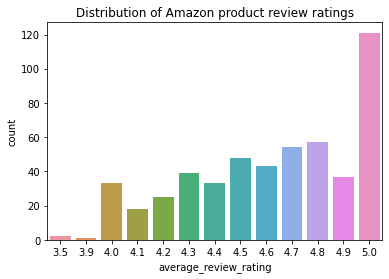

In [78]:
ax = sns.countplot(Average_Review_Rating).set_title('Distribution of Amazon product review ratings')

In [79]:
# Amazon product ratings given less than 5 stars
Five_less_rating = Average_Review_Rating.le(4)

In [80]:
Five_less_rating.head()

0     False
2      True
7     False
8     False
30    False
Name: average_review_rating, dtype: bool

In [81]:
# Count of less than 5 ratings
fourlessRating_Count = Five_less_rating.value_counts()
print(fourlessRating_Count)

False    475
True      36
Name: average_review_rating, dtype: int64


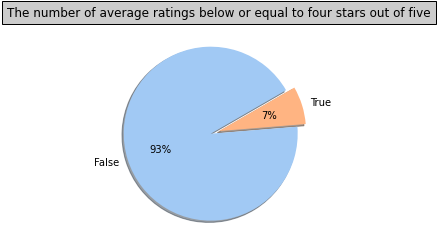

In [82]:
colors = sns.color_palette('pastel')[0:5]
labels = ['False', 'True']
explode = (0.1,0)  

#create pie chart
plt.pie(fourlessRating_Count, labels = labels,explode=explode,colors = colors, autopct='%.0f%%', shadow=True, startangle=30)
plt.title("The number of average ratings below or equal to four stars out of five", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [83]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olatu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Removing everything after // in a string
CustomerReview = Amazon_data['customer_reviews'].str.split('//').str[0]
CustomerReview.head()

0     Worth Buying For The Pictures Alone (As Ever) 
2                           **Highly Recommended!** 
7                                     Beautiful set 
8                                        Five Stars 
30                                       Five Stars 
Name: customer_reviews, dtype: object

In [85]:
print(CustomerReview)

0       Worth Buying For The Pictures Alone (As Ever) 
2                             **Highly Recommended!** 
7                                       Beautiful set 
8                                          Five Stars 
30                                         Five Stars 
                             ...                      
9915                                       Great game 
9916                                Tile/Domino Racks 
9941                                       Four Stars 
9948                                    Hours of Fun! 
9949                                  Simply the best 
Name: customer_reviews, Length: 511, dtype: object


In [86]:
# convert the column to string
print(CustomerReview.dtypes)

object


In [87]:
Customer_Review = CustomerReview.astype(str)

In [88]:
df2 = pd.DataFrame().assign(Review=Customer_Review, LessFiveStar=Five_less_rating)

In [89]:
df2.head()

,Review,LessFiveStar
0,Worth Buying For The Pictures Alone (As Ever),False
2,**Highly Recommended!**,True
7,Beautiful set,False
8,Five Stars,False
30,Five Stars,False


In [90]:
df2['Review'].head()

0     Worth Buying For The Pictures Alone (As Ever) 
2                           **Highly Recommended!** 
7                                     Beautiful set 
8                                        Five Stars 
30                                       Five Stars 
Name: Review, dtype: object

In [91]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    


    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df2['Review'] = df2['Review'].apply(preprocess_text)


In [92]:
df2

,Review,LessFiveStar
0,worth buying picture alone ( ever ),False
2,* * highly recommended ! * *,True
7,beautiful set,False
8,five star,False
30,five star,False
...,...,...
9915,great game,False
9916,tile/domino rack,False
9941,four star,True
9948,hour fun !,False


In [113]:
Review = df2['Review']

In [118]:
AmazonReviews1 = Review.str.replace('[^\w\s]','')


<ipython-input-118-3c0751339a5b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  AmazonReviews1 = Review.str.replace('[^\w\s]','')


In [119]:
AmazonReviews1.head()

0     worth buying picture alone  ever 
2                 highly recommended   
7                         beautiful set
8                             five star
30                            five star
Name: Review, dtype: object

In [94]:
from collections import Counter
from itertools import chain

# split words into lists
v = Review.str.split().tolist() # [s.split() for s in df['Col2'].tolist()]
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
Review = [' '.join([j for j in i if c[j] > 1]) for i in v]

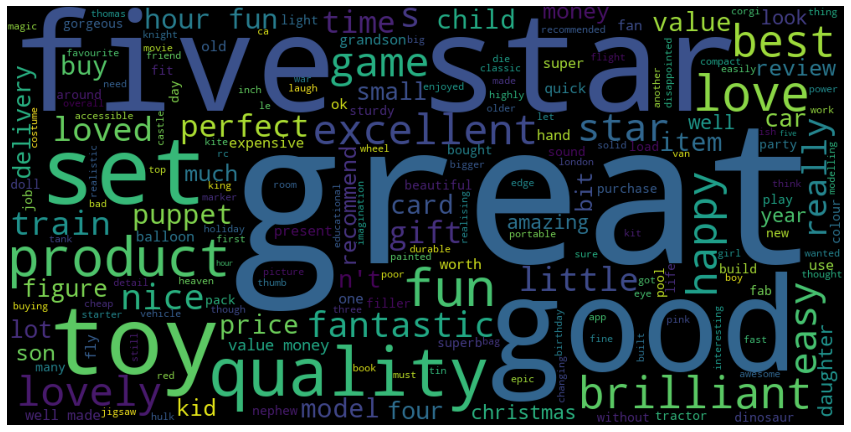

In [95]:
#convert list to string and generate
unique_string=(" ").join(Review)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("ReviewWordCloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [120]:
AmazonData1 = pd.DataFrame().assign(Review=AmazonReviews1, LessFiveStar=Five_less_rating)

In [121]:
AmazonData1

,Review,LessFiveStar
0,worth buying picture alone ever,False
2,highly recommended,True
7,beautiful set,False
8,five star,False
30,five star,False
...,...,...
9915,great game,False
9916,tiledomino rack,False
9941,four star,True
9948,hour fun,False


In [122]:
ProductReview = AmazonData1['Review']

In [123]:
ProductReview.head()

0     worth buying picture alone  ever 
2                 highly recommended   
7                         beautiful set
8                             five star
30                            five star
Name: Review, dtype: object

In [125]:
# Frequency distributions
from nltk.probability import FreqDist
fd = FreqDist(ProductReview)

In [126]:
fd.most_common(3)

[('five star', 46), ('brilliant', 5), ('four star', 5)]

In [127]:
fd.tabulate(3)

five star brilliant four star 
       46         5         5 


In [128]:
# Plot common words
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

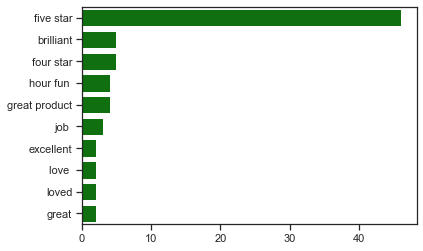

In [129]:
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='green');

In [133]:
# Search specific words
# Show frequency of a specific word
fd["great product"]

4

In [134]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

In [135]:
# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment


In [138]:
# apply get_sentiment function

AmazonData1['sentiment'] = AmazonData1['Review'].apply(get_sentiment)

AmazonData1

,Review,LessFiveStar,sentiment
0,worth buying picture alone ever,False,1
2,highly recommended,True,1
7,beautiful set,False,1
8,five star,False,0
30,five star,False,0
...,...,...,...
9915,great game,False,1
9916,tiledomino rack,False,0
9941,four star,True,0
9948,hour fun,False,1


In [139]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(AmazonData1['LessFiveStar'], AmazonData1['sentiment']))

[[188 287]
 [ 19  17]]


In [140]:
from sklearn.metrics import classification_report

print(classification_report(AmazonData1['LessFiveStar'], AmazonData1['sentiment']))

              precision    recall  f1-score   support

       False       0.91      0.40      0.55       475
        True       0.06      0.47      0.10        36

    accuracy                           0.40       511
   macro avg       0.48      0.43      0.33       511
weighted avg       0.85      0.40      0.52       511

